# TALLER CLUSTERING

In [ ]:
# pandas es una librería de manipulación y análisis de datos que proporciona
# estructuras de datos y funciones para trabajar con datos tabulares.
import pandas as pd
# numpy es una librería para realizar cálculos numéricos eficientes y
# operaciones matriciales en Python.
import numpy as np
# seaborn es una librería de visualización de datos que ofrece una interfaz de
# alto nivel para crear gráficos estadísticos atractivos y informativos.
import seaborn as sns
# matplotlib es una librería para crear gráficos estáticos en Python.
import matplotlib.pyplot as plt
# plotly es una librería de visualización interactiva que permite crear
# gráficos interactivos y dinámicos.
import plotly.graph_objs as go
# plotly express es una extensión de plotly que simplifica la creación de
# gráficos interactivos.
import plotly.express as px

# scikit-learn (sklearn) es una librería de aprendizaje automático
# (machine learning) y normalize es una función para escalar datos.
from sklearn.preprocessing import normalize
# sklearn también ofrece funcionalidad para realizar clustering y KMeans es un
# algoritmo de agrupación.
from sklearn.cluster import KMeans
# estas funciones son de plotly y se utilizan para la visualización interactiva
# en entornos offline.
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [ ]:
original_dataset = pd.read_csv('World Happiness Report 2022.csv')
original_dataset.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


<ipython-input-6-703dab9c399b>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

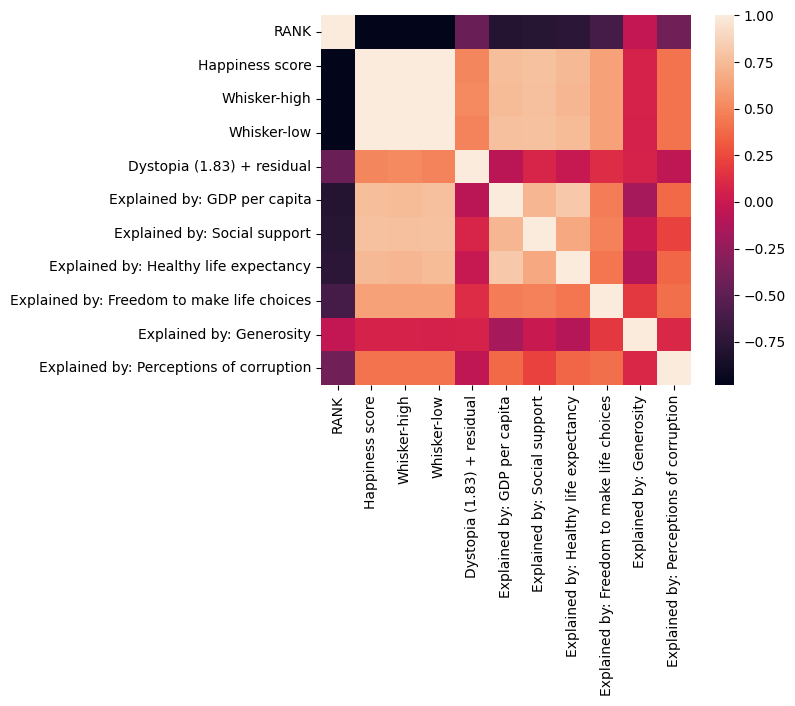

In [ ]:
# Calcular la matriz de correlación entre las variables del conjunto de datos
# original_dataset, para ver las variables con las que podríamos realizar
# la seleccion de X_DATA y así realizar el clustering.
corrmat = original_dataset.corr()

# Crear una figura y un eje para el gráfico.
f, ax = plt.subplots()

# Generar un mapa de calor (heatmap) usando la matriz de correlación.
# El parámetro 'square=True' hace que la representación sea cuadrada.
sns.heatmap(corrmat, square=True)

## Analisis del gráfico de heatmap
Seleccionando los datos con una correlación mayor al 60% ignorando los datos de felicidad:

- Explained by: Healthy life expectancy && Explained by: Social support
- Explained by: Healthy life expectancy && Explained by: GDP per capita
- Explained by: Social support && Explained by: GDP per capita


In [ ]:
# Copia el DataFrame original a uno nuevo llamado dataset_sns
dataset_sns = original_dataset.copy()

# Lista de índices de columnas a eliminar
columnas_a_eliminar = list(range(0, 6)) + list(range(9, 12))

# Utiliza el método drop para eliminar las columnas
dataset_sns = dataset_sns.drop(dataset_sns.columns[columnas_a_eliminar], axis=1)

dataset_sns.head()

,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy
0,1.892,1.258,0.775
1,1.953,1.243,0.777
2,1.936,1.320,0.803
3,2.026,1.226,0.822
4,1.945,1.206,0.787


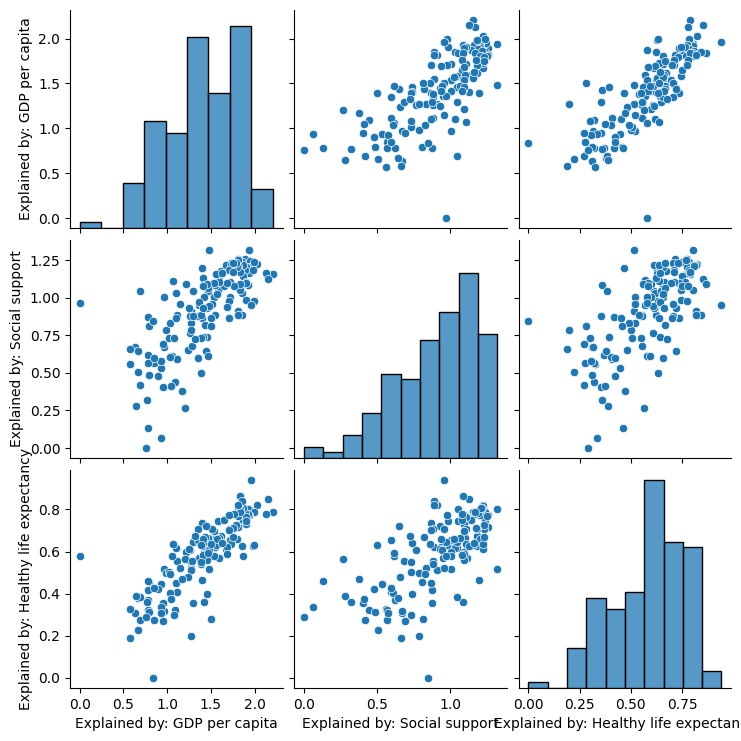

In [ ]:
# Podemos ver como los datos se correlacionan entre ellos por medio de seasborn
sns.pairplot(dataset_sns)

In [ ]:
# Antes de continuar vamos a obserar como se ve el mapa de la felicidad en el
# de acuerdo al ranking

dataMap = dict(type = 'choropleth',
           locations = original_dataset['Country'],
           locationmode = 'country names',
           z = original_dataset['RANK'],
           text = original_dataset['Country'],
           colorbar = {'title':'Ranking'})

layoutMap = dict(title = 'Ranking de Felicidad 2022',
             geo = dict(showframe = False,
                       projection = {'type': 'natural earth'}))

choromap3 = go.Figure(data = [dataMap], layout = layoutMap)
iplot(choromap3)

In [ ]:
# Y también de acuerdo a su puntaje

dataMap = dict(type = 'choropleth',
           locations = original_dataset['Country'],
           locationmode = 'country names',
           z = original_dataset['Happiness score'],
           text = original_dataset['Country'],
           colorbar = {'title':'Puntaje de felicidad'})

layoutMap = dict(title = 'Ranking de Felicidad 2022',
             geo = dict(showframe = False,
                       projection = {'type': 'natural earth'}))

choromap3 = go.Figure(data = [dataMap], layout = layoutMap)
iplot(choromap3)

## Análisis de las gráficas
Como vemos en el primer gráfico los paises entre tenga un mayor número de ranking, son paises menos felices que otros, el otro entre mayor puntaje, mejor, siendo así vemos que:

- Los paises en el continente americano tiene cierto grado de mayor felicidad que los del contienen africano y algunos europeos.

- Paises que están ubicados más al norte del platena parecen más felices con excepción de Rusia, podríamos inferir que se debe a por la guerra que se emprendió en esos momento y hoy en día siguen vigentes.

## Healthy life expectancy && Explained by: Social support

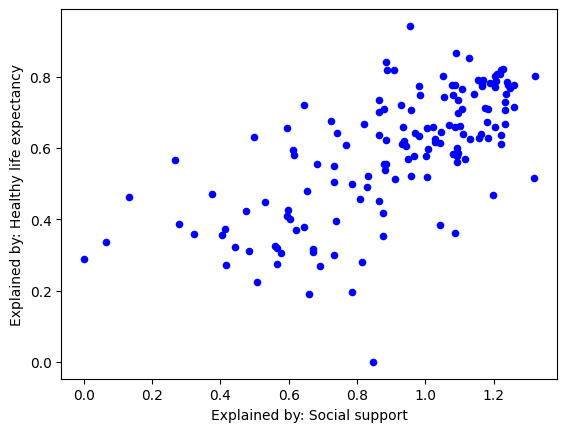

In [ ]:
X_DATA = dataset_sns[["Explained by: Social support",
                      "Explained by: Healthy life expectancy"]].values

X_DATA_GRAPH = dataset_sns[["Explained by: Social support",
                      "Explained by: Healthy life expectancy"]]

plt.scatter(X_DATA_GRAPH["Explained by: Social support"],
            X_DATA_GRAPH["Explained by: Healthy life expectancy"],
            c='blue',
            s=20)

plt.xlabel('Explained by: Social support')
plt.ylabel('Explained by: Healthy life expectancy')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

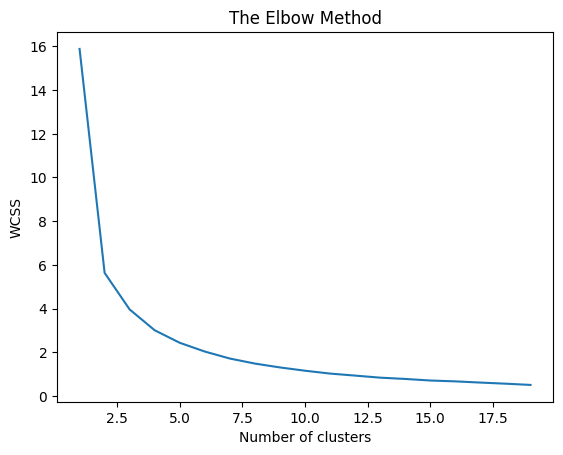

In [ ]:
wcss = []

for i in range(1, 20):
    kmeans = KMeans(
        n_clusters = i,
    )
    kmeans.fit(X_DATA)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Respecto al dataset
Vemos que los es necesario realizar un re-escalado/normalización por la diferencia de valores que hay de los datos, por lo que actualmente hay una mayor dificultad para hallar la cantidad de clusters según el método del codo.

La estandarización garantiza que las diferencias en escala no dominen la influencia de las características en la medida de distancia en el clustering de K-Means.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Copia el DataFrame original a uno nuevo llamado dataset_scaled
dataset_scaled = original_dataset.copy()

# Elimina las columnas 'Country' y 'RANK'
dataset_scaled = dataset_scaled.drop(['Country', 'RANK'], axis=1)

# Aplica la estandarización a los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset_scaled)

# Crea un nuevo DataFrame con los datos estandarizados y las mismas columnas que dataset_scaled
data_scaled = pd.DataFrame(data_scaled, columns=dataset_scaled.columns)

# Agrega de nuevo las columnas 'Country' y 'RANK' al DataFrame estandarizado
data_scaled[['Country', 'RANK']] = original_dataset[['Country', 'RANK']]

# Muestra las primeras filas del DataFrame estandarizado
data_scaled.head()

,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Country,RANK
0,2.093431,2.083317,2.100657,1.287030,1.145968,1.261414,1.074531,1.505066,-0.465089,2.984171,Finland,1
1,1.922627,1.917587,1.926087,0.739351,1.291131,1.207681,1.085912,1.388114,0.492316,2.968432,Denmark,2
2,1.849689,1.862029,1.836541,0.915659,1.250676,1.483508,1.233865,1.381234,1.486078,0.285018,Iceland,3
3,1.808142,1.800822,1.812119,0.602432,1.464851,1.146784,1.341984,1.099173,-0.004565,2.409715,Switzerland,4
4,1.718586,1.692532,1.741567,0.572422,1.272094,1.075141,1.142817,0.920305,1.498197,2.079207,Netherlands,5


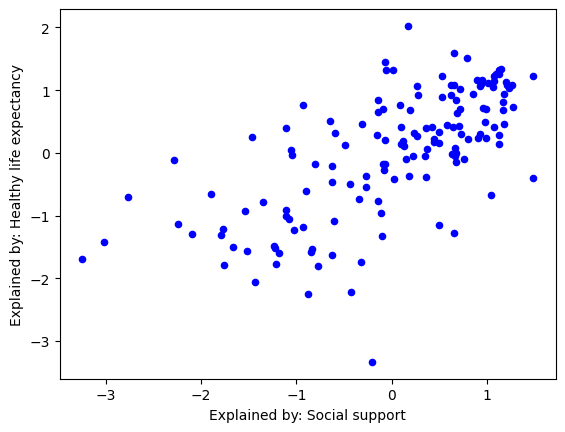

In [ ]:
X_DATA = data_scaled[["Explained by: Social support",
                      "Explained by: Healthy life expectancy"]].values

X_DATA_GRAPH = data_scaled[["Explained by: Social support",
                      "Explained by: Healthy life expectancy"]]

plt.scatter(X_DATA_GRAPH["Explained by: Social support"],
            X_DATA_GRAPH["Explained by: Healthy life expectancy"],
            c='blue',
            s=20)

plt.xlabel('Explained by: Social support')
plt.ylabel('Explained by: Healthy life expectancy')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

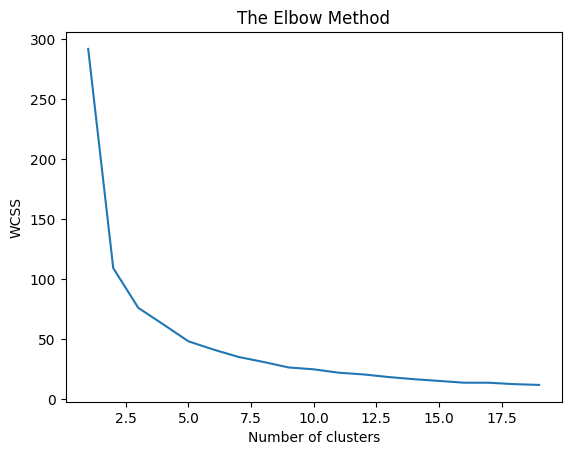

In [ ]:
wcss = []

for i in range(1, 20):
    kmeans = KMeans(
        n_clusters = i,
    )
    kmeans.fit(X_DATA)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Análisis del méotod del codo
Vemos más claro que los posibles valores a escoger pueda ser 3 o 5.

In [ ]:
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(X_DATA)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



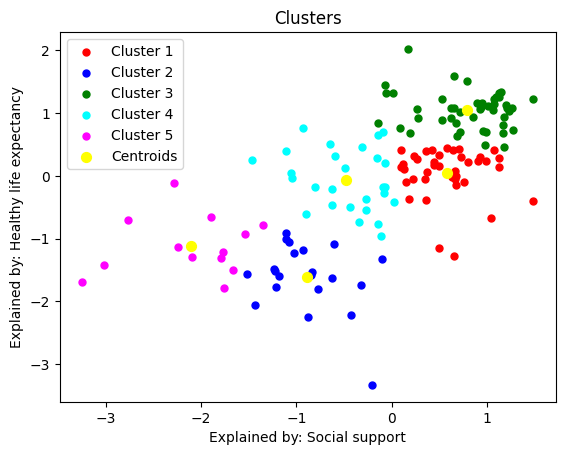

In [ ]:
plt.scatter(X_DATA[y_kmeans == 0, 0], X_DATA[y_kmeans == 0, 1], s = 25, c = 'red', label = 'Cluster 1')
plt.scatter(X_DATA[y_kmeans == 1, 0], X_DATA[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')
plt.scatter(X_DATA[y_kmeans == 2, 0], X_DATA[y_kmeans == 2, 1], s = 25, c = 'green', label = 'Cluster 3')
plt.scatter(X_DATA[y_kmeans == 3, 0], X_DATA[y_kmeans == 3, 1], s = 25, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_DATA[y_kmeans == 4, 0], X_DATA[y_kmeans == 4, 1], s = 25, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Explained by: Social support')
plt.ylabel('Explained by: Healthy life expectancy')
plt.legend()
plt.show()

In [ ]:
data_scaled['Y_KMEANS'] = y_kmeans

datax = dict(type = 'choropleth',
           locations = data_scaled['Country'],
           locationmode = 'country names',
           z = data_scaled['Y_KMEANS'] + 1,
           text = data_scaled['Country'],
           colorbar = {'title':'Y_KMEANS'})

layoutx = dict(title = 'Mapa de Agrupación de Datos de Apoyo Social y Esperanza de Vida del Año 2022',
             geo = dict(showframe = False,
                       projection = {'type': 'natural earth'}))

choromap3 = go.Figure(data = [datax], layout=layoutx)
iplot(choromap3)

## Healthy life expectancy && Explained by: GDP per capita

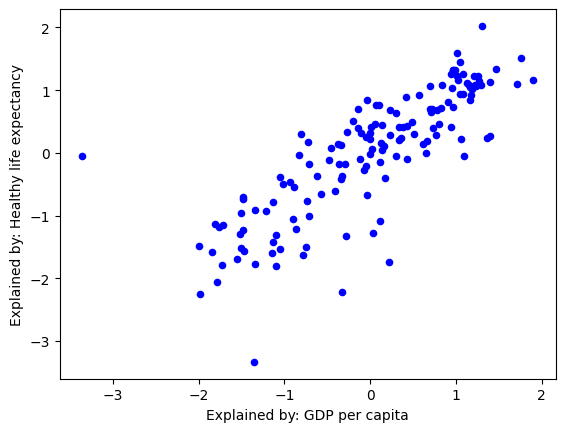

In [ ]:
X_DATA = data_scaled[["Explained by: GDP per capita",
                      "Explained by: Healthy life expectancy"]].values

X_DATA_GRAPH = data_scaled[["Explained by: GDP per capita",
                      "Explained by: Healthy life expectancy"]]

plt.scatter(X_DATA_GRAPH["Explained by: GDP per capita"],
            X_DATA_GRAPH["Explained by: Healthy life expectancy"],
            c='blue',
            s=20)

plt.xlabel('Explained by: GDP per capita')
plt.ylabel('Explained by: Healthy life expectancy')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

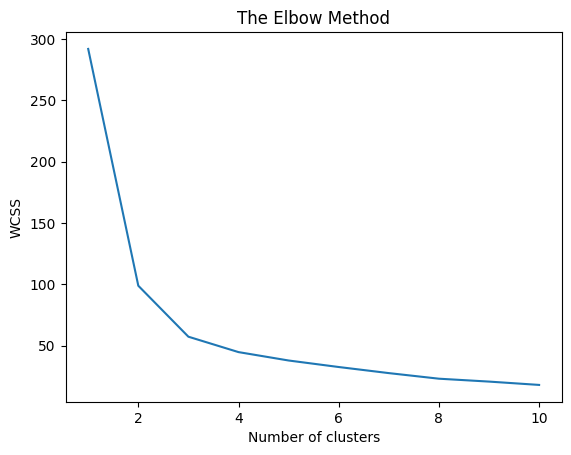

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters = i,
    )
    kmeans.fit(X_DATA)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X_DATA)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



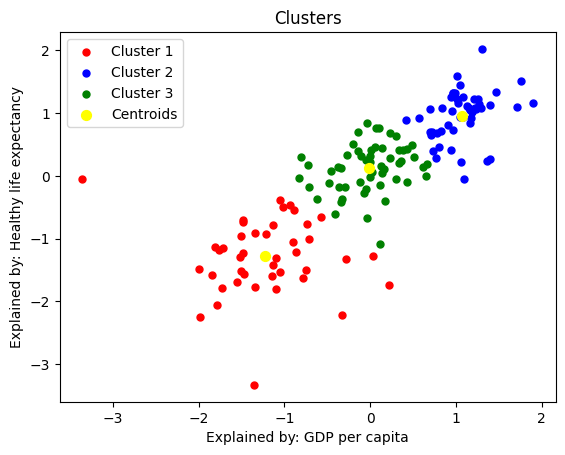

In [ ]:
plt.scatter(X_DATA[y_kmeans == 0, 0], X_DATA[y_kmeans == 0, 1], s = 25, c = 'red', label = 'Cluster 1')
plt.scatter(X_DATA[y_kmeans == 1, 0], X_DATA[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')
plt.scatter(X_DATA[y_kmeans == 2, 0], X_DATA[y_kmeans == 2, 1], s = 25, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Explained by: GDP per capita')
plt.ylabel('Explained by: Healthy life expectancy')
plt.legend()
plt.show()

In [ ]:
data_scaled['Y_KMEANS'] = y_kmeans

datax = dict(type = 'choropleth',
           locations = data_scaled['Country'],
           locationmode = 'country names',
           z = data_scaled['Y_KMEANS'] + 1,
           text = data_scaled['Country'],
           colorbar = {'title':'Y_KMEANS'})

layoutx = dict(title = 'Mapa de Agrupación de Datos de PIB per Capita y Esperanza de Vida del Año 2022',
             geo = dict(showframe = False,
                       projection = {'type': 'natural earth'}))

choromap3 = go.Figure(data = [datax], layout=layoutx)
iplot(choromap3)

## Social support && Explained by: GDP per capita

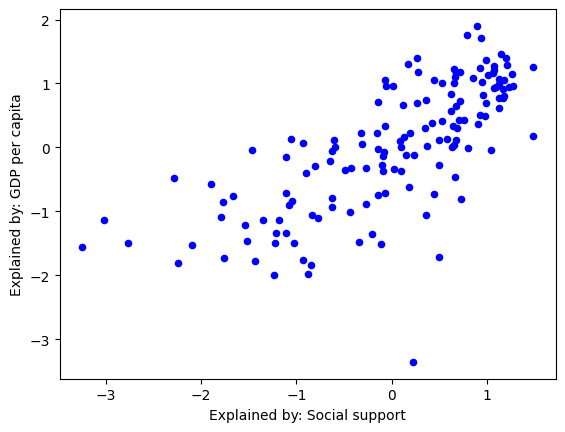

In [ ]:
X_DATA = data_scaled[["Explained by: Social support",
                      "Explained by: GDP per capita"]].values

X_DATA_GRAPH = data_scaled[["Explained by: Social support",
                      "Explained by: GDP per capita"]]

plt.scatter(X_DATA_GRAPH["Explained by: Social support"],
            X_DATA_GRAPH["Explained by: GDP per capita"],
            c='blue',
            s=20)

plt.xlabel('Explained by: Social support')
plt.ylabel('Explained by: GDP per capita')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

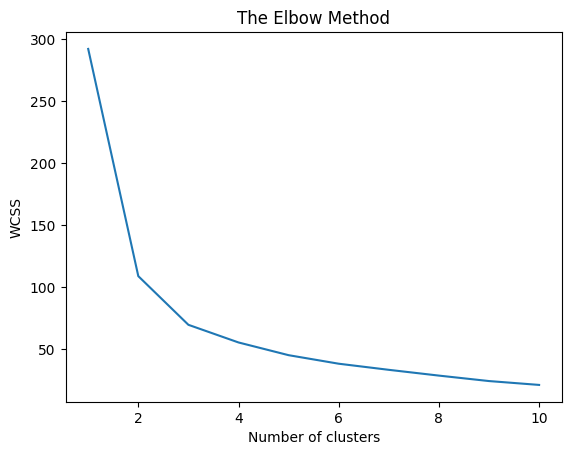

In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(
        n_clusters = i,
    )
    kmeans.fit(X_DATA)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X_DATA)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



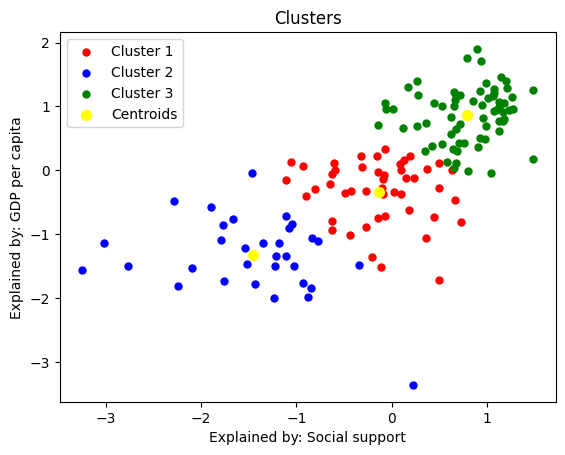

In [ ]:
plt.scatter(X_DATA[y_kmeans == 0, 0], X_DATA[y_kmeans == 0, 1], s = 25, c = 'red', label = 'Cluster 1')
plt.scatter(X_DATA[y_kmeans == 1, 0], X_DATA[y_kmeans == 1, 1], s = 25, c = 'blue', label = 'Cluster 2')
plt.scatter(X_DATA[y_kmeans == 2, 0], X_DATA[y_kmeans == 2, 1], s = 25, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Explained by: Social support')
plt.ylabel('Explained by: GDP per capita')
plt.legend()
plt.show()

In [ ]:
data_scaled['Y_KMEANS'] = y_kmeans

datax = dict(type = 'choropleth',
           locations = data_scaled['Country'],
           locationmode = 'country names',
           z = data_scaled['Y_KMEANS'] + 1,
           text = data_scaled['Country'],
           colorbar = {'title':'Y_KMEANS'})

layoutx = dict(title = 'Mapa de Agrupación de Datos de Apoyo Social y PIB per Capita del Año 2022',
             geo = dict(showframe = False,
                       projection = {'type': 'natural earth'}))

choromap3 = go.Figure(data = [datax], layout=layoutx)
iplot(choromap3)